In [2]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
classes = [ "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge",
           "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair","chimpanzee","clock", "cloud", "cockroach",
           "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
           "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
           "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
           "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray",
           "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
           "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
           "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
           "willow_tree", "wolf", "woman", "worm" ]

2023-04-15 21:25:43.719474: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.9.1


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


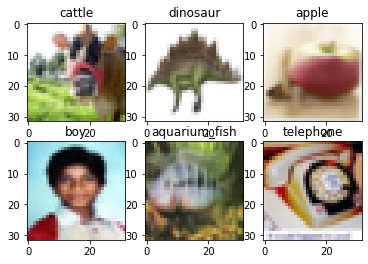

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [3]:
cifar= tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
train_images = train_images/255 

test_labels = test_labels.reshape(-1,)
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


### Dense Neural Network which we used in MNIST 
#### same model gave accuracy for 97% on MNIST


In [13]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(100))

# model.summary()

### CNN Model that we used for MNIST dataet
#### same model gave accuracy for 98% on MNIST


In [18]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(100))

# model.summary()


### Complile and Train the model

In [19]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=20
batchSize=100

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/20
500/500 [==============================] - 13s 26ms/step - loss: 4.1137 - accuracy: 0.0679
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 3.4527 - accuracy: 0.1675
Epoch 3/20
500/500 [==============================] - 13s 26ms/step - loss: 3.0890 - accuracy: 0.2371
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 2.8364 - accuracy: 0.2883
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 2.6219 - accuracy: 0.3304
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 2.4486 - accuracy: 0.3651
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 2.2930 - accuracy: 0.3983
Epoch 8/20
500/500 [==============================] - 13s 26ms/step - loss: 2.1520 - accuracy: 0.4268
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 2.0276 - accuracy: 0.4542
Epoch 10/20
500/500 [==============================] - 13s 26ms/step - loss: 1.893

In [20]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

100/100 [==============================] - 1s 11ms/step - loss: 3.1853 - accuracy: 0.3874
Accuracy :  0.3874000012874603


#### Adding SoftMax Layer

Prediction :  tulip


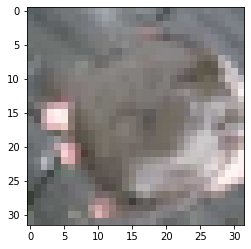

In [21]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(1000)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",classes[test_labels[label0]])

313/313 [==============================] - 1s 4ms/step


<AxesSubplot:>

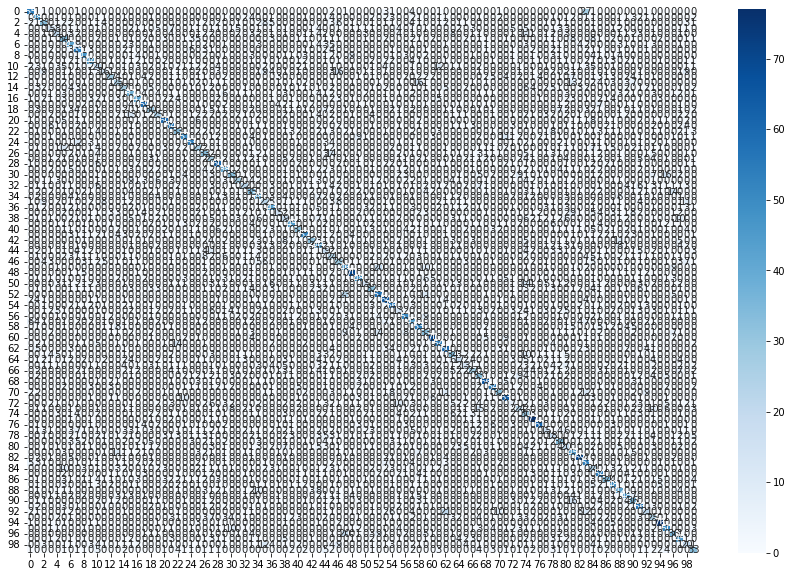

In [22]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=range(100), index=range(100))
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")